# Modulo 1

## Fundamentos de IA

In [3]:
# Importação das bibliotecas fundamentais
import numpy as np
import matplotlib.pyplot as plt
import collections # Para filas de alta performance (deque)
import heapq # Para implementação de filas de prioridade (min-heap)
import random

# Configuração de estilo para os gráficos
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['image.cmap'] = 'Pastel1'
print("Ambiente científico configurado com sucesso.")

Matplotlib is building the font cache; this may take a moment.


Ambiente científico configurado com sucesso.


In [4]:
class Environment:
    """
    Representa o ambiente físico (dois quartos).
    O estado é definido pela localização da sujeira e do agente.
    """
    def __init__(self):
        # Inicialização estocástica do ambiente
        self.locationCondition = {'A': random.choice(['Sujo', 'Limpo']), 
                                  'B': random.choice(['Sujo', 'Limpo'])}
        self.vacuumLocation = random.choice(['A', 'B'])
        print(f"Ambiente Inicializado: {self.locationCondition}, Agente em: {self.vacuumLocation}")

class SimpleReflexAgent:
    """
    Implementação de um Agente Reativo Simples.
    Sua 'inteligência' é um conjunto fixo de regras de produção (if-then).
    """
    def __init__(self, env):
        self.env = env
        self.performance_measure = 0

    def act(self):
        # 1. SENSORES: Adquire a percepção atual (Local, Status)
        location = self.env.vacuumLocation
        status = self.env.locationCondition[location]
        print(f" [Percepção] Estou em {location}. O status é {status}.")

        # 2. FUNÇÃO DE AGENTE (Regras de Condição-Ação)
        # A hierarquia dos 'ifs' define a prioridade das regras.
        action = None
        if status == 'Sujo':
            action = 'ASPIRAR'
        elif location == 'A':
            action = 'MOVER_DIREITA'
        elif location == 'B':
            action = 'MOVER_ESQUERDA'
        
        # 3. ATUADORES: Efetiva a ação no ambiente e atualiza a medida de desempenho
        if action == 'ASPIRAR':
            self.env.locationCondition[location] = 'Limpo'
            self.performance_measure += 1
        elif action == 'MOVER_DIREITA':
            self.env.vacuumLocation = 'B'
        elif action == 'MOVER_ESQUERDA':
            self.env.vacuumLocation = 'A'
            
        return action

# --- Execução da Simulação ---
env_instance = Environment()
agent_instance = SimpleReflexAgent(env_instance)

print("\n--- Início do Ciclo de Vida do Agente ---")
# Simulamos 5 ciclos de percepção-ação
for i in range(1, 6):
    print(f"Step {i}:")
    action_taken = agent_instance.act()
    print(f" [Ação] O agente executou: {action_taken}")
    print("-" * 30)

print(f"--- Fim da Simulação. Medida de Desempenho Final: {agent_instance.performance_measure} ---")

Ambiente Inicializado: {'A': 'Sujo', 'B': 'Sujo'}, Agente em: B

--- Início do Ciclo de Vida do Agente ---
Step 1:
 [Percepção] Estou em B. O status é Sujo.
 [Ação] O agente executou: ASPIRAR
------------------------------
Step 2:
 [Percepção] Estou em B. O status é Limpo.
 [Ação] O agente executou: MOVER_ESQUERDA
------------------------------
Step 3:
 [Percepção] Estou em A. O status é Sujo.
 [Ação] O agente executou: ASPIRAR
------------------------------
Step 4:
 [Percepção] Estou em A. O status é Limpo.
 [Ação] O agente executou: MOVER_DIREITA
------------------------------
Step 5:
 [Percepção] Estou em B. O status é Limpo.
 [Ação] O agente executou: MOVER_ESQUERDA
------------------------------
--- Fim da Simulação. Medida de Desempenho Final: 2 ---


## Implementação de algoritmos de busca em grafos

In [5]:
# Definição do Espaço de Estados (Grid/Matriz)
# Codificação: 0=Livre, 1=Obstáculo, 2=Início, 3=Objetivo
grid_map = [
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [2, 1, 0, 1, 1, 0, 0, 0, 1, 3], 
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
]
# Coordenadas (Linha, Coluna)
start_node = (5, 0)
goal_node = (5, 9)

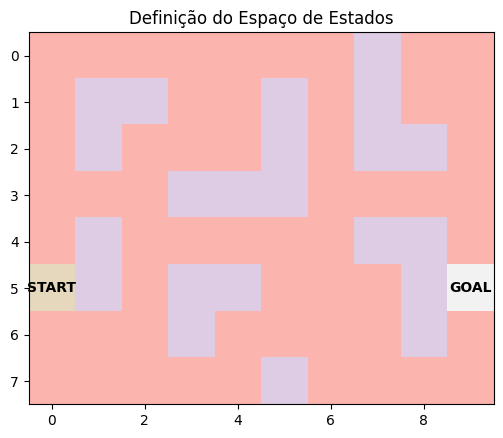

In [6]:
def plot_search_result(grid, path=None, title="Resultado da Busca"):
    """Função auxiliar para renderização gráfica do espaço de estados e do caminho."""
    grid_np = np.array(grid)
    plt.imshow(grid_np)
    plt.title(title)
    
    # Marcações textuais para Início e Fim
    for (i, j), val in np.ndenumerate(grid_np):
        if val == 2: plt.text(j, i, 'START', ha='center', va='center', fontweight='bold')
        if val == 3: plt.text(j, i, 'GOAL', ha='center', va='center', fontweight='bold')

    # Renderização do caminho (se encontrado)
    if path:
        # Desempacota as coordenadas Y e X do caminho
        y_coords, x_coords = zip(*path)
        plt.plot(x_coords, y_coords, marker='o', color='crimson', markersize=6, linewidth=3, label='Caminho Ótimo')
        plt.legend()
    plt.show()

# Visualização do problema inicial
plot_search_result(grid_map, title="Definição do Espaço de Estados")

Análise BFS: Solução encontrada. Custo do caminho: 15 passos.
Esforço Computacional: 56 nós foram expandidos e verificados.


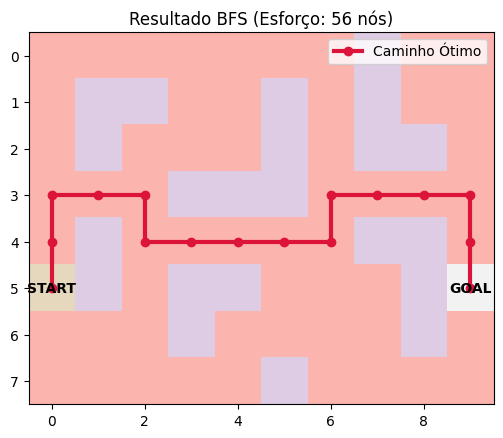

In [7]:
def bfs_architecture(grid, start, goal):
    """
    Implementação da arquitetura de Busca em Largura.
    Usa uma 'deque' (double-ended queue) para operação O(1) de popleft().
    """
    rows, cols = len(grid), len(grid[0])
    
    # A FRONTEIRA: Inicializada com o estado inicial.
    # Armazenamos o caminho completo até o nó na fila.
    queue = collections.deque([[start]])
    
    # CONJUNTO EXPLORADO: Para evitar ciclos e estados redundantes.
    seen = set([start])
    nodes_explored_count = 0
    
    while queue:
        # Remove o nó mais raso da fronteira (FIFO)
        path = queue.popleft()
        current_node = path[-1] # O nó atual é o último do caminho
        r, c = current_node
        
        # Teste de Objetivo
        if current_node == goal:
            return path, nodes_explored_count
        
        # Expansão do Nó: Gera sucessores válidos
        # Vetores de direção: Cima, Baixo, Esquerda, Direita
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            
            # Verifica validade: Dentro do grid? Não é parede? Não foi visto?
            if (0 <= nr < rows and 
                0 <= nc < cols and 
                grid[nr][nc] != 1 and 
                (nr, nc) not in seen):
                
                queue.append(path + [(nr, nc)]) # Adiciona novo caminho à fronteira
                seen.add((nr, nc)) # Marca como visto
                nodes_explored_count += 1
                
    return None, nodes_explored_count # Falha se a fronteira ficar vazia

# Execução e Análise
path_bfs, metric_bfs = bfs_architecture(grid_map, start_node, goal_node)
print(f"Análise BFS: Solução encontrada. Custo do caminho: {len(path_bfs)-1} passos.")
print(f"Esforço Computacional: {metric_bfs} nós foram expandidos e verificados.")
plot_search_result(grid_map, path_bfs, title=f"Resultado BFS (Esforço: {metric_bfs} nós)")

Análise A*: Solução encontrada. Custo do caminho: 15 passos.
Esforço Computacional: 41 nós foram expandidos (Compare com BFS!).


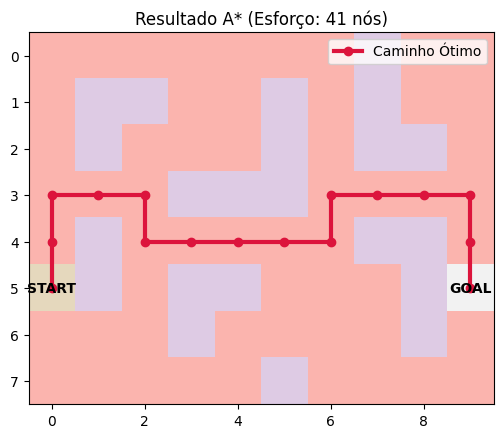

In [8]:
def heuristic_manhattan(node_a, node_b):
    """
    Função Heurística Admissível h(n).
    Calcula a Distância de Manhattan entre dois pontos.
    """
    return abs(node_a[0] - node_b[0]) + abs(node_a[1] - node_b[1])

def a_star_architecture(grid, start, goal):
    """
    Implementação da arquitetura A*.
    Utiliza 'heapq' para manter a fronteira ordenada pelo f-score.
    """
    rows, cols = len(grid), len(grid[0])
    
    # A FRONTEIRA (Min-Heap): Armazena tuplas (f_score, g_score, nó_atual, caminho)
    # O heap ordena automaticamente pelo primeiro elemento da tupla (f_score).
    priority_queue = [(0, 0, start, [start])]
    
    # Conjunto explorado para evitar processamento redundante
    seen = set()
    nodes_explored_count = 0
    
    while priority_queue:
        # Extrai o nó com o MENOR f(n) da fronteira
        current_f, current_g, (r, c), path = heapq.heappop(priority_queue)
        
        if (r, c) in seen: continue
        seen.add((r, c))
        nodes_explored_count += 1
        
        # Teste de Objetivo
        if (r, c) == goal:
            return path, nodes_explored_count
        
        # Expansão do Nó
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            
            if (0 <= nr < rows and 
                0 <= nc < cols and 
                grid[nr][nc] != 1 and 
                (nr, nc) not in seen):
                
                # CÁLCULO DOS CUSTOS
                # Custo para mover para o vizinho é +1
                neighbor_g = current_g + 1 
                
                # Calcula a heurística do vizinho até o objetivo
                neighbor_h = heuristic_manhattan((nr, nc), goal)
                
                # Custo total estimado f(n) = g(n) + h(n)
                neighbor_f = neighbor_g + neighbor_h
                
                # Adiciona à fila de prioridade
                heapq.heappush(priority_queue, (neighbor_f, neighbor_g, (nr, nc), path + [(nr, nc)]))
                
    return None, nodes_explored_count

# Execução e Análise
path_astar, metric_astar = a_star_architecture(grid_map, start_node, goal_node)
print(f"Análise A*: Solução encontrada. Custo do caminho: {len(path_astar)-1} passos.")
print(f"Esforço Computacional: {metric_astar} nós foram expandidos (Compare com BFS!).")
plot_search_result(grid_map, path_astar, title=f"Resultado A* (Esforço: {metric_astar} nós)")